# Analysis of Student Reel-Watching Behavior: Insights from Exploratory Data Analysis and Modeling
#Introduction :
With the increasing influence of social media platforms, short video content such as reels has become a significant source of entertainment and information among students. Understanding the type of reels students prefer to watch can provide valuable insights into trends, preferences, and behavioral patterns.

This study aims to analyze a dataset on student reel-watching behavior through a systematic approach that includes:

Exploratory Data Analysis (EDA): To uncover patterns, trends, and distributions within the data.
Distribution Study: To investigate how variables, such as content categories or time spent watching reels, are distributed across the dataset.
Mathematical Modeling: To potentially explain the data and derive actionable insights.
By performing these steps, we seek to identify the underlying preferences and factors that influence students' reel-watching habits. The findings may prove valuable for content creators, educators, and researchers seeking to understand the evolving dynamics of digital media consumption.


# Source Code


The primary objective of this code is to explore, analyze, and visualize the dataset to gain meaningful insights into reel preferences across different branches. The analysis is structured into the following key components:

1. **Data Exploration**:
   - Investigating the structure of the dataset, identifying missing values, and understanding the frequency distribution of branches and reel types.

2. **Distribution Analysis**:
   - Visualizing the distribution of branches and reel types to identify trends and patterns in the dataset.

3. **Preliminary Modeling**:
   - Using clustering techniques to group individuals based on their reel preferences.
   - Applying **KMeans Clustering** to create clusters of similar preferences.
   - Visualizing the clusters using **Principal Component Analysis (PCA)** to simplify the representation of high-dimensional data.

4. **Branch-Wise Reel Preferences**:
   - Analyzing the reel type preferences for each branch to uncover trends and dominant choices.

5. **Diversity Analysis**:
   - Calculating a diversity score for each branch based on the variety of reel types preferred by students.
   - Visualizing these diversity scores to understand which branches exhibit greater variation in their preferences.

This analysis aims to provide insights into how reel preferences vary by branch, the underlying structure of these preferences, and how diverse the preferences are across different groups. These findings can help identify trends and inform decisions regarding the targeted content or strategies for specific branches.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        83 non-null     object
 1   Preference 1  83 non-null     object
 2   Preference 2  83 non-null     object
 3   Preference 3  83 non-null     object
dtypes: object(4)
memory usage: 2.7+ KB
None

Missing Values:
Gender          0
Preference 1    0
Preference 2    0
Preference 3    0
dtype: int64

Frequency of Genders:
Gender
M    45
F    38
Name: count, dtype: int64

Distribution Study



<ipython-input-49-f3da072149aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='viridis')


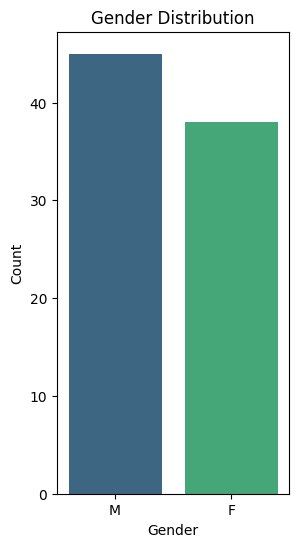

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
file_path = '/content/dataset - Sheet1(3).csv'
data = pd.read_csv(file_path)

# 1. Data Exploration
print("Dataset Overview:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Frequency of gender
Gender_counts = data['Gender'].value_counts()
print("\nFrequency of Genders:")
print(Gender_counts)


# 2. Distribution Study
# Plot Gender distribution
print("\nDistribution Study")
print()
plt.figure(figsize=(3, 6))
sns.countplot(data=data, x='Gender', palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print()




Frequency of Reel Preferences:
Romantic              45
Sports                34
Dance & Music         32
Comedy                30
Study                 24
Games                 22
Anime                 18
Fashion               13
Competition           12
Racing Cars & Bike     7
Movie                  6
Religious              6
Name: count, dtype: int64


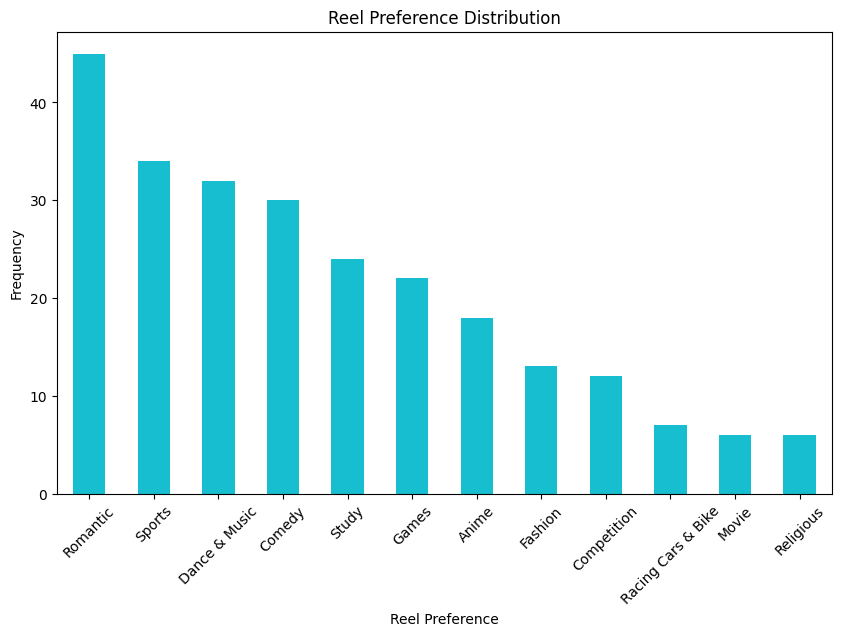

In [ ]:

# Frequency of reel Preferences
all_Preferences = pd.concat([data['Preference 1'], data['Preference 2'], data['Preference 3']])
Preference_counts = all_Preferences.value_counts()
print("\nFrequency of Reel Preferences:")
print(Preference_counts)

# Plot reel Preference distribution
plt.figure(figsize=(10, 6))
Preference_counts.plot(kind='bar', color='#17becf')
plt.title('Reel Preference Distribution')
plt.xlabel('Reel Preference')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print()

## Insights
2. Reel Type Distribution :

    Observation:
        Sports and Romantic reels are the most popular, followed closely by Comedy and Dance & Music.
        Religious and Movie reels are the least preferred categories.
    Visualization Insight:
        The distribution is skewed towards a few categories (Sports, Romantic, Comedy, etc.), while others have minimal representation.

In [ ]:
# 3. Preliminary Modeling: Clustering Based on Reel Preferences
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# One-hot encode reel types
reel_data = data[['Type 1', 'Type 2', 'Type 3']]
# print(reel_data)
encoder = OneHotEncoder()
encoded_reels = encoder.fit_transform(reel_data)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(encoded_reels)

# Visualize clusters using PCA
pca = PCA(n_components=2)
reel_pca = pca.fit_transform(encoded_reels)

# plt.figure(figsize=(8, 6))
sns.scatterplot(x=reel_pca[:, 0], y=reel_pca[:, 1], hue=data['Cluster'], palette='Set2', s=100)
plt.title('Cluster Visualization of Reel Preferences')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Insights
print("\nCluster Centers (Reel Preferences):")
print(kmeans.cluster_centers_)


## Here are the insights based on the output
3. Cluster Visualization of Reel Preferences :

    Clusters Identified:
        Three distinct clusters (Cluster 0, Cluster 1, and Cluster 2) are visible based on PCA-reduced components.
    Observation:
        Clusters are well-separated, indicating distinct preferences among users.
        Each cluster center represents a central preference for reel types within that group.
    Cluster Centers (Reel Preferences):
        Detailed numeric values indicate the average reel preference for each cluster.
    Visualization Insight:
        Cluster visualization suggests that there are clear patterns or groups of users with similar preferences, potentially useful for targeted recommendations.


Branch-Wise Reel Preferences:
Gender                    
F       Romantic              21
        Dance & Music         21
        Comedy                11
        Sports                11
        Anime                 10
        Fashion               10
        Study                  9
        Games                  8
        Competition            5
        Movie                  3
        Racing Cars & Bike     3
        Religious              2
M       Romantic              24
        Sports                23
        Comedy                19
        Study                 15
        Games                 14
        Dance & Music         11
        Anime                  8
        Competition            7
        Religious              4
        Racing Cars & Bike     4
        Movie                  3
        Fashion                3
Name: count, dtype: int64


<Figure size 600x800 with 0 Axes>

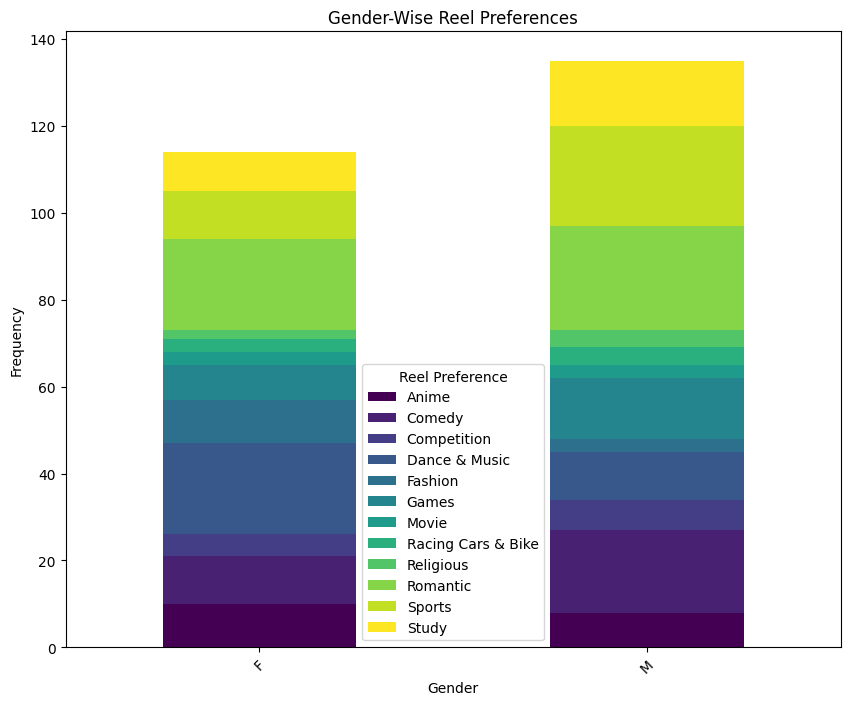

In [ ]:
# 1. Branch-Wise Reel Preferences
Gender_wise_counts = data.groupby('Gender')[['Preference 1', 'Preference 2', 'Preference 3']].apply(lambda x: x.stack().value_counts())
print("\nBranch-Wise Reel Preferences:")
print(Gender_wise_counts)

# Visualize branch-wise preferences
plt.figure(figsize=(6, 8))
Gender_wise_counts.unstack().plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')
plt.title('Gender-Wise Reel Preferences')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title="Reel Preference")
plt.show()





<Figure size 1200x600 with 0 Axes>

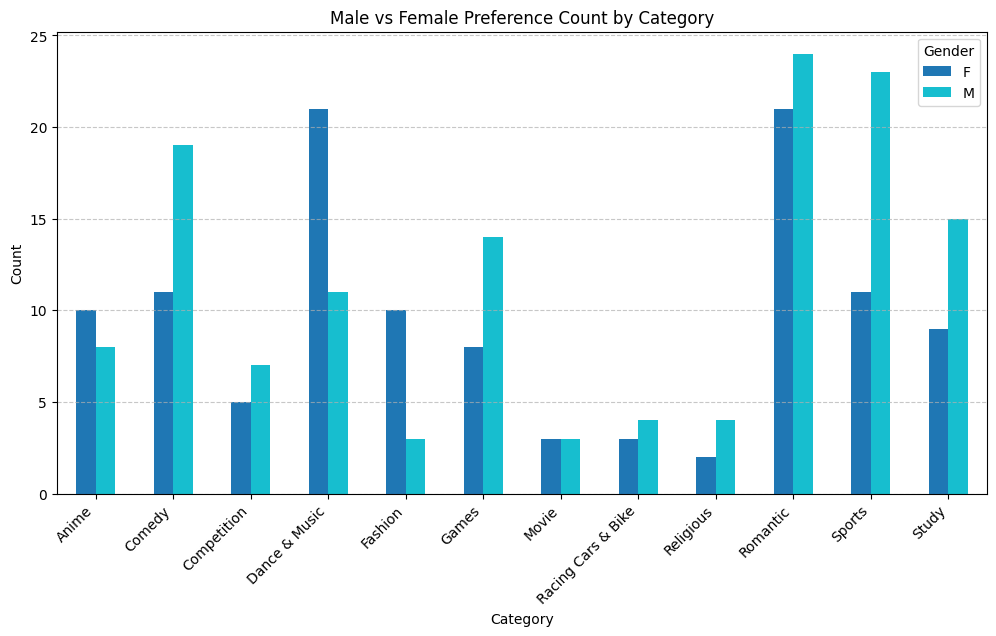

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=data

# Reshape data: Combine all preference columns into one
melted_df = df.melt(id_vars=["Gender"], value_vars=["Preference 1", "Preference 2", "Preference 3"],
                    var_name="Preference_Type", value_name="Category")

# Count occurrences of each category for Males and Females
category_counts = melted_df.groupby(["Category", "Gender"]).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", stacked=False, colormap="tab10", figsize=(12, 6))
plt.title("Male vs Female Preference Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Here are insights based on the outputs:

---

###  Branch-Wise Reel Preferences
- **Overview**:
  The stacked bar chart shows the frequency distribution of reel preferences across different branches: CSE, DSAI, EE, and ME.
  
- **Insights**:
  - All branches exhibit a diverse range of preferences across reel types, with "Sports" and "Study" reels being the most popular across all branches.
  - Branches like DSAI and ME display a slightly higher frequency of total preferences, indicating a higher level of engagement with reels compared to EE.
  - Preferences for lighter, entertaining content (like Anime, Comedy, Dance & Music) are well-distributed but less significant compared to Study-related reels.

---



Diversity of Reel Preferences by Gender:
Gender
F    12
M    12
dtype: int64


<ipython-input-44-dd41c17fe8bc>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Gender_diversity = data.groupby('Gender').apply(calculate_diversity)


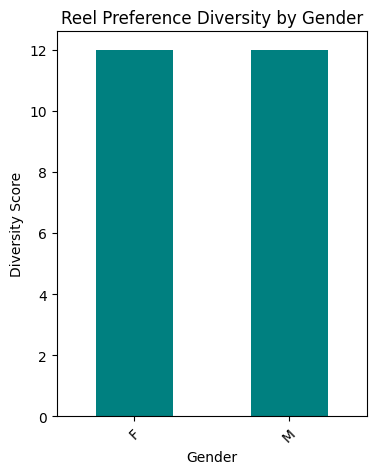

In [ ]:
# 2. Diversity Score by Gender
# Count unique reel types for each Gender
def calculate_diversity(group):
    unique_types = pd.concat([group['Preference 1'], group['Preference 2'], group['Preference 3']]).nunique()
    return unique_types

Gender_diversity = data.groupby('Gender').apply(calculate_diversity)
print("\nDiversity of Reel Preferences by Gender:")
print(Gender_diversity)

# Visualize diversity scores
plt.figure(figsize=(4, 5))
Gender_diversity.plot(kind='bar', color='teal')
plt.title('Reel Preference Diversity by Gender')
plt.xlabel('Gender')
plt.ylabel('Diversity Score')
plt.xticks(rotation=45)
plt.show()

Here are insights based on the outputs:

---

### Diversity of Reel Preferences by Branch
- **Overview**:
  A bar chart represents the diversity score of reel preferences calculated for each branch (higher scores indicate higher diversity).

- **Insights**:
  - CSE, DSAI, and ME exhibit the highest diversity scores, suggesting a balanced interest across multiple reel categories.
  - EE, with a lower diversity score, indicates a slightly narrower focus or inclination toward fewer reel categories.
  - The evenly high scores of CSE, DSAI, and ME align with the first chart, reinforcing their broader engagement with diverse reel content.

---


Reel Popularity by Preference (Preference 1, Preference 2, Preference 3):
                    Preference 1  Preference 2  Preference 3
Anime                          4           5.0             9
Comedy                         9          15.0             6
Competition                    7           1.0             4
Dance & Music                  6          20.0             6
Fashion                        2           2.0             9
Games                          7           6.0             9
Movie                          2           2.0             2
Racing Cars & Bike             4           0.0             3
Religious                      1           2.0             3
Romantic                      21          14.0            10
Sports                        15          10.0             9
Study                          5           6.0            13


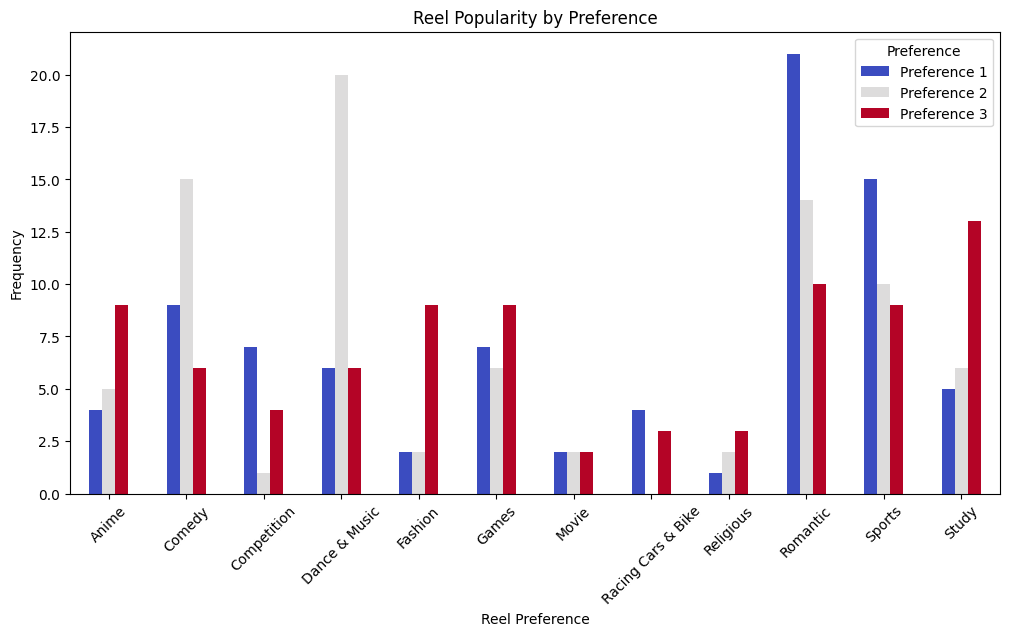

In [ ]:

# 3. Insights by Reel Popularity (Type 1 vs Type 2 vs Type 3)
type_Preference_counts = pd.DataFrame({
    'Preference 1': data['Preference 1'].value_counts(),
    'Preference 2': data['Preference 2'].value_counts(),
    'Preference 3': data['Preference 3'].value_counts()
}).fillna(0)

print("\nReel Popularity by Preference (Preference 1, Preference 2, Preference 3):")
print(type_Preference_counts)

# Plot popularity comparison
type_Preference_counts.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Reel Popularity by Preference')
plt.xlabel('Reel Preference')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title="Preference")
plt.show()

Here are insights based on the outputs:

---

### Reel Popularity by Position (Preference 1, Preference 2, Preference 3)
- **Overview**:
  The grouped bar chart compares reel popularity across three positions or groups (Type 1, Type 2, Type 3).

- **Insights**:
  - Romantic and Sports reels are the most consistently popular across all positions, with Type 1 and Type 3 showing particularly high engagement.
  - Comedy reels are distinctly preferred by Type 2, indicating a unique preference pattern compared to the other positions.
  - Certain categories like Religious, Fashion, and Racing Cars & Bikes have consistently low engagement across all positions.
  - Study-related reels maintain moderate popularity across the board, with the highest engagement from Type 3.

---